## 230968364 Week 3 
### Exercise 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

df=pd.read_csv("D:\\MIT\\ML\\LAB\\week3\\diabetes.csv",comment='#')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,NaN,NaN,NaN
764,2,122,70,27,0,36.8,0.340,27,0,NaN,NaN,NaN
765,5,121,72,23,112,26.2,0.245,30,0,NaN,NaN,NaN
766,1,126,60,0,0,30.1,0.349,47,1,NaN,NaN,NaN


In [4]:
df = df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 1. Use the “pima-indians-diabetes.csv” dataset and note down the meta information. 

In [5]:
print(df.describe())

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())

df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
print(df.isnull().sum())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

### 2. Compute mean & standard deviation, tabulate and visualize the age of the patients.

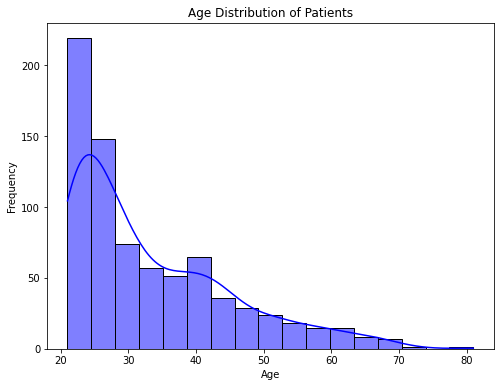

,Mean,Standard Deviation
0,33.240885,11.760232


In [6]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

mean_age, std_age

age_stats = pd.DataFrame({
    'Mean': [mean_age],
    'Standard Deviation': [std_age]
})

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Display the statistics
age_stats

### 3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

In [7]:
age_bmi_outcome = df.groupby('Outcome')[['Age', 'BMI']].mean()
age_bmi_outcome

,Age,BMI
Outcome,,
0,31.190000,30.880200
1,37.067164,35.381343


### 4. Tabulate the class label and comment on whether the classes are balanced

In [8]:
class_counts = df['Outcome'].value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

### 5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [9]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.46%


### 6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map. 

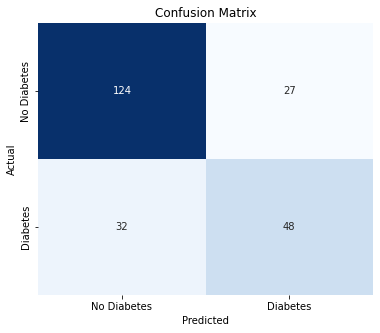

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 7. Compute accuracy rate, true positive and true negative rate and comment on the performance. 

In [13]:
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)

TPR = TP / (TP + FN) 
TNR = TN / (TN + FP)  

accuracy, TPR, TNR

(0.7445887445887446, 0.6, 0.8211920529801324)

### 8. Visualize the ROC curve, and comment on the performance of the classifier. 

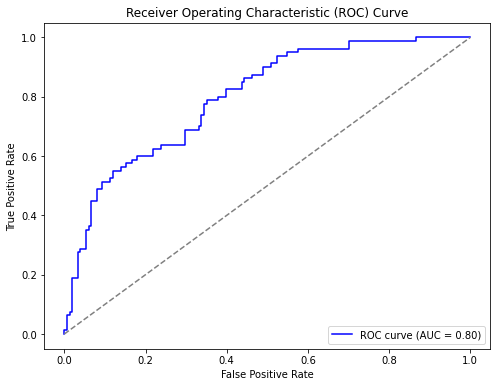

In [14]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()